In [19]:
import numpy as np 

v1 = 5 # volts
v2 = 10 # volts
r = 1 # ohm

A = np.array([[-r, -r, 0, 0], [r, 0, r, 0], [0, r, 0, r], [1, -1, -1, 1]])
b = np.array([v1, -v2, v2, 0])

x = np.linalg.solve(A,b)
x

array([-7.5,  2.5, -2.5,  7.5])

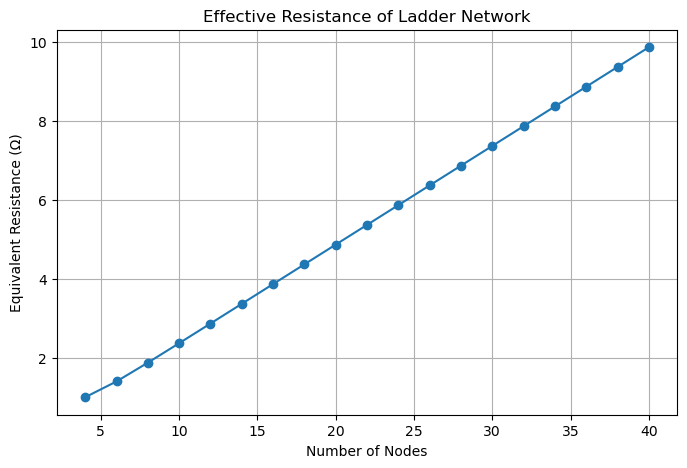

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def resistor_network(n, r1, r2, r3, r4):
    
    assert n % 2 == 0 # Number of nodes must be even

    # Initialize system
    G = np.zeros((n, n))   # conductance matrix
    rhs = np.zeros(n)          # right-hand side

    for i in range(n):
        if i % 2 == 0:  # Top rail node
            # Horizontal connections
            if i >= 2:
                G[i, i] += 1 / r1
                G[i, i-2] -= 1 / r1
            if i + 2 < n:
                G[i, i] += 1 / r1
                G[i, i+2] -= 1 / r1
            # Diagonal connections
            G[i, i] += 1 / r4
            G[i, i+1] -= 1 / r4
        else:  # Bottom rail node
            # Horizontal connections
            if i >= 2:
                G[i, i] += 1 / r2
                G[i, i-2] -= 1 / r2
            if i + 2 < n:
                G[i, i] += 1 / r2
                G[i, i+2] -= 1 / r2
            # Vertical up
            G[i, i] += 1 / r3
            G[i, i-1] -= 1 / r3

    # Boundary conditions
    G[0, :] = 0
    G[0, 0] = 1
    rhs[0] = 1.0   # input at 1 V

    G[-1, :] = 0
    G[-1, -1] = 1
    rhs[-1] = 0.0  # ground

    return G, rhs


def effective_resistance(n, r1, r2, r3, r4):
    G, rhs = resistor_network(n, r1, r2, r3, r4)
    V = np.linalg.solve(G, rhs)

    # Current leaving the input node (node 0)
    I_in = (V[0] - V[2]) / r1 + (V[0] - V[1]) / r3
    return 1.0 / I_in


if __name__ == "__main__":
    # Sweep network sizes
    node_counts = np.arange(4, 42, 2)
    Req_values = [effective_resistance(N, 1, 1, 1, 1) for N in node_counts]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(node_counts, Req_values, "o-", lw=1.5)
    plt.title("Effective Resistance of Ladder Network")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Equivalent Resistance (Ω)")
    plt.grid(True)
    plt.show()

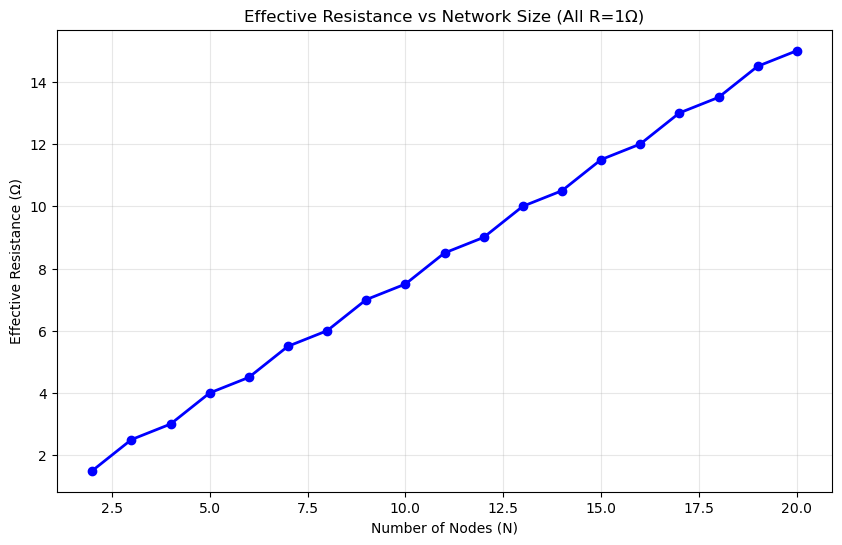

Effective resistances for different network sizes:
N =  2: R_eff = 1.500000 Ω
N =  3: R_eff = 2.500000 Ω
N =  4: R_eff = 3.000000 Ω
N =  5: R_eff = 4.000000 Ω
N =  6: R_eff = 4.500000 Ω
N =  7: R_eff = 5.500000 Ω
N =  8: R_eff = 6.000000 Ω
N =  9: R_eff = 7.000000 Ω
N = 10: R_eff = 7.500000 Ω
N = 11: R_eff = 8.500000 Ω
N = 12: R_eff = 9.000000 Ω
N = 13: R_eff = 10.000000 Ω
N = 14: R_eff = 10.500000 Ω
N = 15: R_eff = 11.500000 Ω
N = 16: R_eff = 12.000000 Ω
N = 17: R_eff = 13.000000 Ω
N = 18: R_eff = 13.500000 Ω
N = 19: R_eff = 14.500000 Ω
N = 20: R_eff = 15.000000 Ω


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def resistor_network(N, r1, r2, r3, r4):    
    G = np.zeros((N, N))
    
    for i in range(N):
        node_num = i + 1
        
        # Ground connection ONLY for the last node (V_N)
        if node_num == N:  # Last node connects to ground
            G[i, i] += 1/r2
        
        # Horizontal connections (top resistors)
        if node_num > 1:  # Left connection
            G[i, i] += 1/r1
            G[i, i-1] -= 1/r1
        
        if node_num < N:  # Right connection  
            G[i, i] += 1/r1
            G[i, i+1] -= 1/r1
        
        # Diagonal connections (r3 and r4)
        if node_num % 2 == 1:  # Odd node
            if node_num < N:  # Connection to next even node (r3)
                G[i, i] += 1/r3
                G[i, i+1] -= 1/r3
                
        else:  # Even node
            if node_num > 1:  # Connection to previous odd node (r4)
                G[i, i] += 1/r4
                G[i, i-1] -= 1/r4
    
    # Create current vector: 1A into node 1, 0 for others
    I = np.zeros(N)
    I[0] = 1.0  # 1A current into first node
    
    # Solve for node voltages
    V = np.linalg.solve(G, I)
    
    # Effective resistance = voltage at node 1 (since I=1A)
    return V[0]

# Test with increasing N and all resistors = 1Ω
N_values = range(2, 21)  # Test from 2 to 20 nodes
resistances = [resistor_network(N, 1, 1, 1, 1) for N in N_values]

# Create the comparison figure
plt.figure(figsize=(10, 6))
plt.plot(N_values, resistances, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Effective Resistance (Ω)')
plt.title('Effective Resistance vs Network Size (All R=1Ω)')
plt.grid(True, alpha=0.3)
plt.show()

# Print results
print("Effective resistances for different network sizes:")
for i, N in enumerate(N_values):
    print(f"N = {N:2d}: R_eff = {resistances[i]:.6f} Ω")

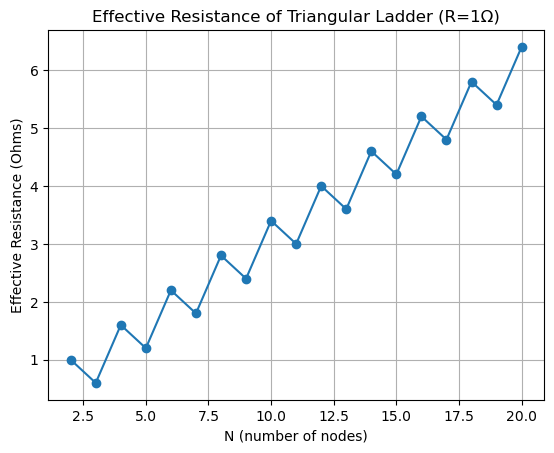

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def resistor_network(N, r1, r2, r3, r4):
    """
    Construct conductance matrix and RHS for the triangular resistor ladder.
    N : total number of nodes
    r1, r2, r3, r4 : resistor values
    """
    G = np.zeros((N, N))

    def add_resistor(i, j, R):
        g = 1.0 / R
        G[i, i] += g
        G[j, j] += g
        G[i, j] -= g
        G[j, i] -= g

    # Top rail (even nodes)
    for k in range(2, N, 2):
        add_resistor(k-2, k-1, r1)

    # Bottom rail (odd nodes)
    for k in range(3, N+1, 2):
        add_resistor(k-3, k-1, r2)

    # Diagonals (odd→even and even→odd)
    for k in range(1, N, 2):   # odd nodes
        if k < N:
            add_resistor(k-1, k, r3)
    for k in range(2, N, 2):   # even nodes
        if k < N:
            add_resistor(k-1, k, r4)

    return G

def effective_resistance(N, r1, r2, r3, r4):
    G = resistor_network(N, r1, r2, r3, r4)
    # Apply boundary conditions: V+=1V, Ground=0V
    fixed = [0, N-1]
    free = [i for i in range(N) if i not in fixed]

    # Partition the matrix
    G_ff = G[np.ix_(free, free)]
    G_fc = G[np.ix_(free, fixed)]

    Vc = np.array([1.0, 0.0])  # source=1V, ground=0V
    Vf = np.linalg.solve(G_ff, -G_fc @ Vc)

    V = np.zeros(N)
    V[fixed] = Vc
    V[free] = Vf

    # Compute input current at source node (node 0)
    Iin = 0
    for j in range(1, N):
        if G[0, j] != 0:
            Iin += (V[0] - V[j]) * (-G[0, j]) / G[0, 0] * G[0, 0]
    # Better way: use KCL directly
    Iin = sum((V[0] - V[j]) * (-G[0,j]) for j in range(N) if j!=0)

    return 1.0 / Iin

# Test: compare effective resistance vs N
Ns = range(2, 21)
Rvals = [effective_resistance(N, 1, 1, 1, 1) for N in Ns]

plt.plot(Ns, Rvals, marker="o")
plt.xlabel("N (number of nodes)")
plt.ylabel("Effective Resistance (Ohms)")
plt.title("Effective Resistance of Triangular Ladder (R=1Ω)")
plt.grid(True)
plt.show()


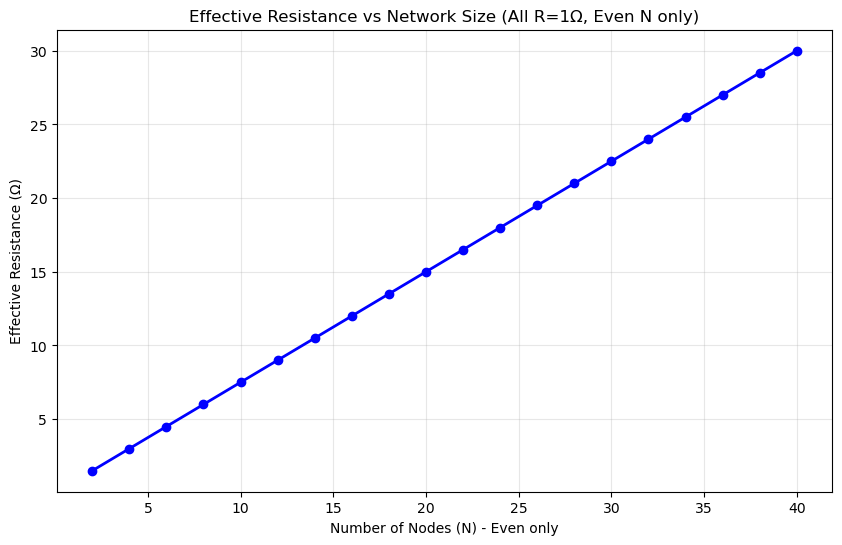

Effective resistances for different network sizes (Even N only):
N =  2: R_eff = 1.500000 Ω
N =  4: R_eff = 3.000000 Ω
N =  6: R_eff = 4.500000 Ω
N =  8: R_eff = 6.000000 Ω
N = 10: R_eff = 7.500000 Ω
N = 12: R_eff = 9.000000 Ω
N = 14: R_eff = 10.500000 Ω
N = 16: R_eff = 12.000000 Ω
N = 18: R_eff = 13.500000 Ω
N = 20: R_eff = 15.000000 Ω
N = 22: R_eff = 16.500000 Ω
N = 24: R_eff = 18.000000 Ω
N = 26: R_eff = 19.500000 Ω
N = 28: R_eff = 21.000000 Ω
N = 30: R_eff = 22.500000 Ω
N = 32: R_eff = 24.000000 Ω
N = 34: R_eff = 25.500000 Ω
N = 36: R_eff = 27.000000 Ω
N = 38: R_eff = 28.500000 Ω
N = 40: R_eff = 30.000000 Ω


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def resistor_network(N, r1, r2, r3, r4):    
    G = np.zeros((N, N))
    
    for i in range(N):
        node_num = i + 1
        
        # Ground connection for the last node (V_N)
        if node_num == N: 
            G[i, i] += 1/r2
        
        # Horizontal connections (top resistors)
        if node_num > 1:  # Left connection
            G[i, i] += 1/r1
            G[i, i-1] -= 1/r1
        
        if node_num < N:  # Right connection  
            G[i, i] += 1/r1
            G[i, i+1] -= 1/r1
        
        # Diagonal connections (r3 and r4)
        if node_num % 2 == 1:  # Odd node
            if node_num < N:  # Connection to next even node (r3)
                G[i, i] += 1/r3
                G[i, i+1] -= 1/r3
                
        else:  # Even node
            if node_num > 1:  # Connection to previous odd node (r4)
                G[i, i] += 1/r4
                G[i, i-1] -= 1/r4
    
    # Create current vector: 1A into node 1, 0 for others
    I = np.zeros(N)
    I[0] = 1.0
    
    # Solve for node voltages
    V = np.linalg.solve(G, I)
    
    # Effective resistance = voltage at node 1 (since I=1A)
    return V[0]

# Test with increasing even N values only
N_values = range(2, 41, 2)  # Even numbers from 2 to 20
resistances = [resistor_network(N, 1, 1, 1, 1) for N in N_values]

# Create the comparison figure
plt.figure(figsize=(10, 6))
plt.plot(N_values, resistances, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Number of Nodes (N) - Even only')
plt.ylabel('Effective Resistance (Ω)')
plt.title('Effective Resistance vs Network Size (All R=1Ω, Even N only)')
plt.grid(True, alpha=0.3)

plt.show()

# Print results
print("Effective resistances for different network sizes (Even N only):")
for i, N in enumerate(N_values):
    print(f"N = {N:2d}: R_eff = {resistances[i]:.6f} Ω")